# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
try:
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import requests
    import time
    import datetime
    import pprint
    import scipy.stats as st
    from scipy.stats import linregress
    import sys, os
   
    sys.path.append(os.path.realpath('..'))
    # Incorporated citipy to determine city based on latitude and longitude
    from citipy import citipy
    #import citypy run: pip install citipy
    
    # Import API keys
    sys.path.append('..\\apikeys')
    from api_keys import weather_api_key
    
    from my_func import lregression
    
    
except Exception as e:
    print(f"a module(s) have not been imported {e}" )

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#print(sys.path)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [22]:
import pprint
pprint.pp(cities)

['oxford',
 'rikitea',
 'iqaluit',
 'xining',
 'fare',
 'mys shmidta',
 'ossora',
 'pangnirtung',
 'edd',
 'bukama',
 'acapulco',
 'hobart',
 'poum',
 'komsomolskiy',
 'beaune',
 'nuevo progreso',
 'do gonbadan',
 'satitoa',
 'mana',
 'albany',
 'punta arenas',
 'guerrero negro',
 'khatanga',
 'acarau',
 'inhuma',
 'mahebourg',
 'turka',
 'puerto ayora',
 'cherskiy',
 'broken hill',
 'saint-augustin',
 'nizhneyansk',
 'kapaa',
 'erenhot',
 'havre-saint-pierre',
 'thinadhoo',
 'sao filipe',
 'naryan-mar',
 'kijang',
 'louisbourg',
 'bluff',
 'vaini',
 'barrow',
 'yellowknife',
 'dharchula',
 'korla',
 'taolanaro',
 'busselton',
 'butaritari',
 'mataura',
 'prieska',
 'santa cruz',
 'madhogarh',
 'grand river south east',
 'ushuaia',
 'touros',
 'klaksvik',
 'ponta do sol',
 'port alfred',
 'adrar',
 'karratha',
 'new norfolk',
 'progreso',
 'saldanha',
 'port elizabeth',
 'upernavik',
 'thompson',
 'chimbote',
 'samarai',
 'mar del plata',
 'upata',
 'kruisfontein',
 'bredasdorp',
 'mou

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)
qjson = requests.get(f'{query_url}san diego').json()

pprint.pp(qjson)

http://api.openweathermap.org/data/2.5/weather?appid=2bf09c264630bd0a49d6d608d5307394&units=metric&q=
{'coord': {'lon': -117.16, 'lat': 32.72},
 'weather': [{'id': 803,
              'main': 'Clouds',
              'description': 'broken clouds',
              'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 11.68,
          'feels_like': 10.45,
          'temp_min': 10.56,
          'temp_max': 13,
          'pressure': 1024,
          'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 1.34, 'deg': 288},
 'clouds': {'all': 75},
 'dt': 1609648679,
 'sys': {'type': 1,
         'id': 5771,
         'country': 'US',
         'sunrise': 1609599069,
         'sunset': 1609635255},
 'timezone': -28800,
 'id': 5391811,
 'name': 'San Diego',
 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#Create lists to capture our data
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed= []
country = []
list_cities = []


In [25]:
# start appending data into lists
i = 0
city_missing = []
missctycnt = 0
for x in cities:
    response = requests.get(query_url + x).json()
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
                
        list_cities.append(x)
        i +=1
        
        #print(f"i count: {i} | {x}") # should have a total of 624 cities count
    except :
        #print ("unable to find city")
        city_missing.append(x) #add cities that were not found
        missctycnt +=1 #count Missing cities
        pass
              
print("Review city count | make sure cities are matching")
print(f"Total cities in list: {i}")
print(f"Total missing lists: {missctycnt}")

Review city count | make sure cities are matching
Total cities in list: 557
Total missing lists: 44


In [26]:
#capture data into a dataframe to reuse
cityall_df = pd.DataFrame({'City': list_cities,
                           'Lat': lat,
                           'Lng': lng,
                           'Max Temp': maxtemp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': windspeed,
                           'Country': country                         
                          
                          } )

cityall_df.head()
cityall_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
cityhumidity = cityall_df.loc[cityall_df['Humidity']>100,:]
print(f"Total cities where the humidity is over 100% {cityhumidity['City'].count()}")

Total cities where the humidity is over 100% 0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [28]:
from datetime import date
today = date.today()

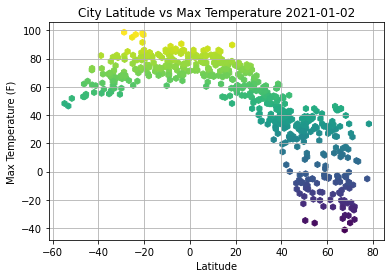

In [29]:
#Plot for latitude vs temperature. Convert max temperature from C to F degrees
x = cityall_df['Lat']
#(Celsius * 9/5) + 32
y = (cityall_df['Max Temp']*9/5)+32
plt.scatter(x,y, c=y, marker='h')
plt.grid()
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Max Temperature {today}')


plt.savefig(f'output_data/lat_vs_temperature_{today}.png')
plt.show()

## Latitude vs. Humidity Plot

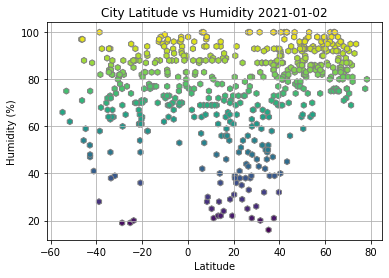

In [30]:
#Plot for latitude vs Humidity.
x = cityall_df['Lat']
y = cityall_df['Humidity']
plt.scatter(x,y, c=y, marker='h', edgecolor='grey')
plt.grid()
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Humidity {today}')

plt.savefig(f'output_data/lat_vs_humidity_{today}.png')
plt.show()

## Latitude vs. Cloudiness Plot

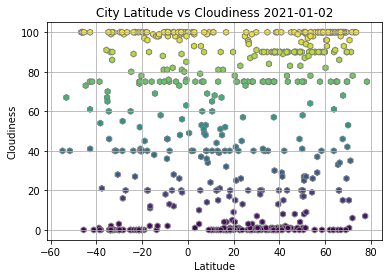

In [33]:
#Plot for latitude vs Humidity.
x = cityall_df['Lat']
y = cityall_df['Cloudiness']
plt.scatter(x,y, c=y, marker='h', edgecolor='grey')
plt.grid()
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Cloudiness {today}')

plt.savefig(f'output_data/lat_vs_cloudiness_{today}.png')
plt.show()

## Latitude vs. Wind Speed Plot

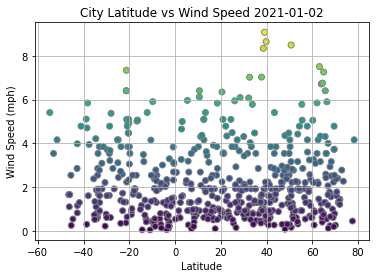

In [34]:
#Plot for latitude vs Wind. Convert KM to Miles for wind speed
x = cityall_df['Lat']
y = cityall_df['Wind Speed']/1.609
plt.scatter(x,y, c=y, marker='o', edgecolor='grey')
plt.grid()
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Wind Speed {today}')

plt.savefig(f'output_data/lat_vs_windspeed_{today}.png')
plt.show()

## Linear Regression

In [ ]:
# Create a Scatter Plot for temperature vs latitude
x_values = cityall_df['Lat']
#(Celsius * 9/5) + 32
y_values = (cityall_df['Max Temp']*9/5)+32
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
#plt.show()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15 )

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
l_eq = lregression(x,y)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
cityall_df['Hemisphere'] =['Northern' if x>=0 else 'Southern' for x in cityall_df['Lat'] ]
cityall_df.head(10)

In [ ]:
#cityall_df.head()
Northern = cityall_df.loc[cityall_df['Hemisphere']=='Northern']
Southern = cityall_df.loc[cityall_df['Hemisphere']=='Southern']

In [ ]:
# Create a Scatter Plot for temperature vs latitude
x_values = Northern['Lat']
#(Celsius * 9/5) + 32
y_values = (Northern['Max Temp']*9/5)+32
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15 )

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Create a Scatter Plot for temperature vs latitude
x_values = Southern['Lat']
#(Celsius * 9/5) + 32
y_values = (Southern['Max Temp']*9/5)+32
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15 )

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression